<a href="https://colab.research.google.com/github/AMARGERA/MOBILE-PRICE-PREDICTION/blob/main/Mobile_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div class="markdown-google-sans">
  <h1>Welcome to Colab!</h1>
</div>

<!-- TODO(b/319266067) remove temporary advert after a few weeks. -->
<div class="markdown-google-sans">
  <h2>(New) Try the Gemini API</h2>
  <ul>
  <li><a href="https://makersuite.google.com/app/apikey">Generate a Gemini API key</a></li>
  <li><a href="https://colab.research.google.com/github/googlecolab/colabtools/blob/main/notebooks/Talk_to_Gemini_with_Google%27s_Speech_to_Text_API.ipynb?utm_medium=link&utm_campaign=gemini">Talk to Gemini with the Speech-to-Text API</a></li>
  <li><a href="https://colab.research.google.com/github/google/generative-ai-docs/blob/main/site/en/tutorials/python_quickstart.ipynb?utm_medium=link&utm_campaign=gemini">Gemini API: Quickstart with Python</a></li>
  <li><a href="https://colab.research.google.com/notebooks/snippets/gemini.ipynb?utm_medium=link&utm_campaign=gemini">Gemini API code sample</a></li>
  <li><a href="https://colab.research.google.com/github/googlecolab/colabtools/blob/main/notebooks/Learning_with_Gemini_and_ChatGPT.ipynb?utm_medium=link&utm_campaign=gemini">Compare Gemini with ChatGPT</a></li>  
  <li><a href="https://colab.google/notebooks/?utm_medium=link&utm_campaign=gemini">More notebooks</a></li>
  </ul>
</div>


# New section

In [ ]:
import warnings

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

from sklearn import metrics
from sklearn.metrics import confusion_matrix,classification_report,ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import KFold,StratifiedKFold
from sklearn.model_selection import cross_val_score, cross_validate

In [ ]:
import plotly.express as px

In [ ]:
%notebook matplotlib
from warnings import filterwarnings
filterwarnings('ignore')

In [ ]:
train=pd.read_csv('/content/train.csv')
test=pd.read_csv('/content/test.csv')

In [ ]:
train

NameError: name 'train' is not defined

In [ ]:
print('trian_shape:',train.shape)
print('test_shape',test.shape)

trian_shape: (2000, 21)
test_shape (1000, 21)


In [ ]:
train.info

<bound method DataFrame.info of       battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  \
0               842     0          2.2         0   1       0           7   
1              1021     1          0.5         1   0       1          53   
2               563     1          0.5         1   2       1          41   
3               615     1          2.5         0   0       0          10   
4              1821     1          1.2         0  13       1          44   
...             ...   ...          ...       ...  ..     ...         ...   
1995            794     1          0.5         1   0       1           2   
1996           1965     1          2.6         1   0       0          39   
1997           1911     0          0.9         1   1       1          36   
1998           1512     0          0.9         0   4       1          46   
1999            510     1          2.0         1   5       1          45   

      m_dep  mobile_wt  n_cores  ...  px_height  px_width   ram  sc_h  sc_w  \
0       0.6        188        2  ...         20       756  2549     9     7   
1       0.7        136        3  ...        905      1988  2631    17     3   
2       0.9        145        5  ...       1263      1716  2603    11     2   
3       0.8        131        6  ...       1216      1786  2769    16     8   
4       0.6        141        2  ...       1208      1212  1411     8     2   
...     ...        ...      ...  ...        ...       ...   ...   ...   ...   
1995    0.8        106        6  ...       1222      1890   668    13     4   
1996    0.2        187        4  ...        915      1965  2032    11    10   
1997    0.7        108        8  ...        868      1632  3057     9     1   
1998    0.1        145        5  ...        336       670   869    18    10   
1999    0.9        168        6  ...        483       754  3919    19     4   

      talk_time  three_g  touch_screen  wifi  price_range  
0            19        0             0     1            1  
1             7        1             1     0            2  
2             9        1             1     0            2  
3            11        1             0     0            2  
4            15        1             1     0            1  
...         ...      ...           ...   ...          ...  
1995         19        1             1     0            0  
1996         16        1             1     1            2  
1997          5        1             1     0            3  
1998         19        1             1     1            0  
1999          2        1             1     1            3  

[2000 rows x 21 columns]>

In [ ]:
test.info

<bound method DataFrame.info of        id  battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  \
0       1           1043     1          1.8         1  14       0           5   
1       2            841     1          0.5         1   4       1          61   
2       3           1807     1          2.8         0   1       0          27   
3       4           1546     0          0.5         1  18       1          25   
4       5           1434     0          1.4         0  11       1          49   
..    ...            ...   ...          ...       ...  ..     ...         ...   
995   996           1700     1          1.9         0   0       1          54   
996   997            609     0          1.8         1   0       0          13   
997   998           1185     0          1.4         0   1       1           8   
998   999           1533     1          0.5         1   0       0          50   
999  1000           1270     1          0.5         0   4       1          35   

     m_dep  mobile_wt  ...  pc  px_height  px_width   ram  sc_h  sc_w  \
0      0.1        193  ...  16        226      1412  3476    12     7   
1      0.8        191  ...  12        746       857  3895     6     0   
2      0.9        186  ...   4       1270      1366  2396    17    10   
3      0.5         96  ...  20        295      1752  3893    10     0   
4      0.5        108  ...  18        749       810  1773    15     8   
..     ...        ...  ...  ..        ...       ...   ...   ...   ...   
995    0.5        170  ...  17        644       913  2121    14     8   
996    0.9        186  ...   2       1152      1632  1933     8     1   
997    0.5         80  ...  12        477       825  1223     5     0   
998    0.4        171  ...  12         38       832  2509    15    11   
999    0.1        140  ...  19        457       608  2828     9     2   

     talk_time  three_g  touch_screen  wifi  
0            2        0             1     0  
1            7        1             0     0  
2           10        0             1     1  
3            7        1             1     0  
4            7        1             0     1  
..         ...      ...           ...   ...  
995         15        1             1     0  
996         19        0             1     1  
997         14        1             0     0  
998          6        0             1     0  
999          3        1             0     1  

[1000 rows x 21 columns]>

In [ ]:
train.describe(include='all')

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [ ]:
test.describe(include='all')

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000
mean,500.500000,1248.510000,0.516000,1.540900,0.517000,4.593000,0.487000,33.652000,0.517500,139.51100,...,10.054000,627.121000,1239.774000,2138.998000,11.995000,5.316000,11.085000,0.756000,0.50000,0.507000
std,288.819436,432.458227,0.499994,0.829268,0.499961,4.463325,0.500081,18.128694,0.280861,34.85155,...,6.095099,432.929699,439.670981,1088.092278,4.320607,4.240062,5.497636,0.429708,0.50025,0.500201
min,1.000000,500.000000,0.000000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.00000,...,0.000000,0.000000,501.000000,263.000000,5.000000,0.000000,2.000000,0.000000,0.00000,0.000000
25%,250.750000,895.000000,0.000000,0.700000,0.000000,1.000000,0.000000,18.000000,0.300000,109.75000,...,5.000000,263.750000,831.750000,1237.250000,8.000000,2.000000,6.750000,1.000000,0.00000,0.000000
50%,500.500000,1246.500000,1.000000,1.500000,1.000000,3.000000,0.000000,34.500000,0.500000,139.00000,...,10.000000,564.500000,1250.000000,2153.500000,12.000000,5.000000,11.000000,1.000000,0.50000,1.000000
75%,750.250000,1629.250000,1.000000,2.300000,1.000000,7.000000,1.000000,49.000000,0.800000,170.00000,...,16.000000,903.000000,1637.750000,3065.500000,16.000000,8.000000,16.000000,1.000000,1.00000,1.000000
max,1000.000000,1999.000000,1.000000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.00000,...,20.000000,1907.000000,1998.000000,3989.000000,19.000000,18.000000,20.000000,1.000000,1.00000,1.000000


If you're already familiar with Colab, check out this video to learn about interactive tables, the executed code history view, and the command palette.

<center>
  <a href="https://www.youtube.com/watch?v=rNgswRZ2C1Y" target="_blank">
  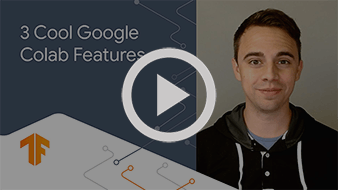
  </a>
</center>

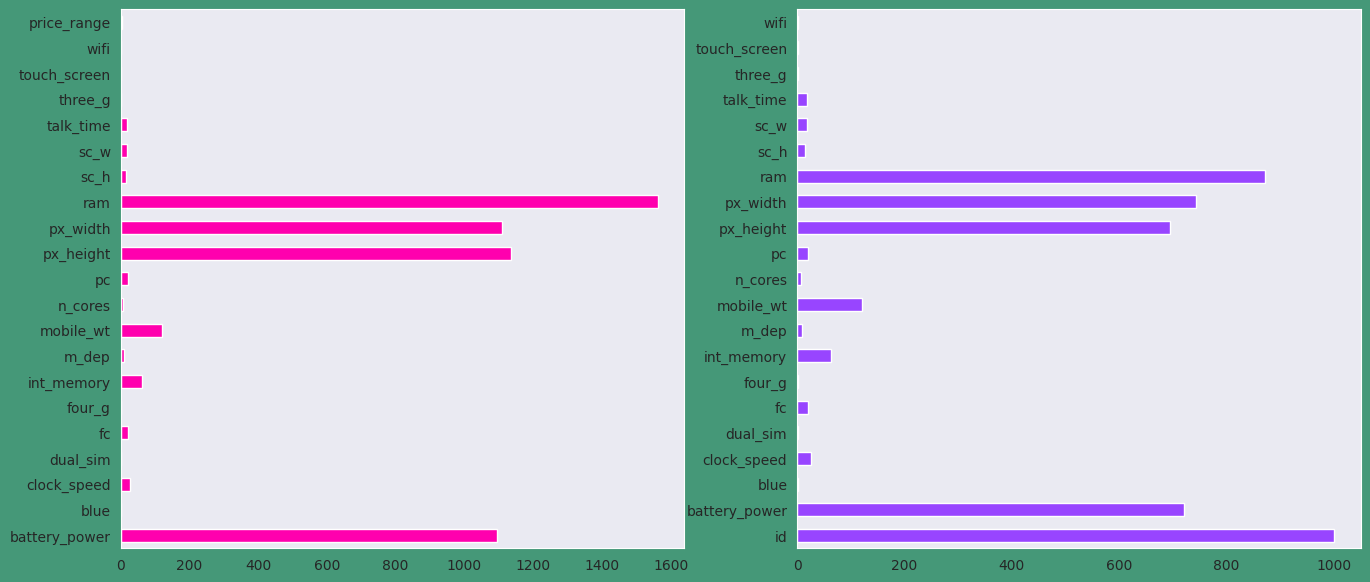

In [ ]:
sns.set_style('darkgrid')
color = 'royalblue'

fig, ax = plt.subplots(1, 2, figsize=(16,7),dpi=100,facecolor='#459878')
train.nunique().plot(kind='barh',color='#ff00ae',ax=ax[0],label='train')
ax[0].grid()
test.nunique().plot(kind='barh',color='#9845ff',ax=ax[1],label='test')
ax[1].grid()

In [ ]:
test.drop('id',inplace=True,axis=1)

In [ ]:
train_without_target=train.drop('price_range',axis=1)

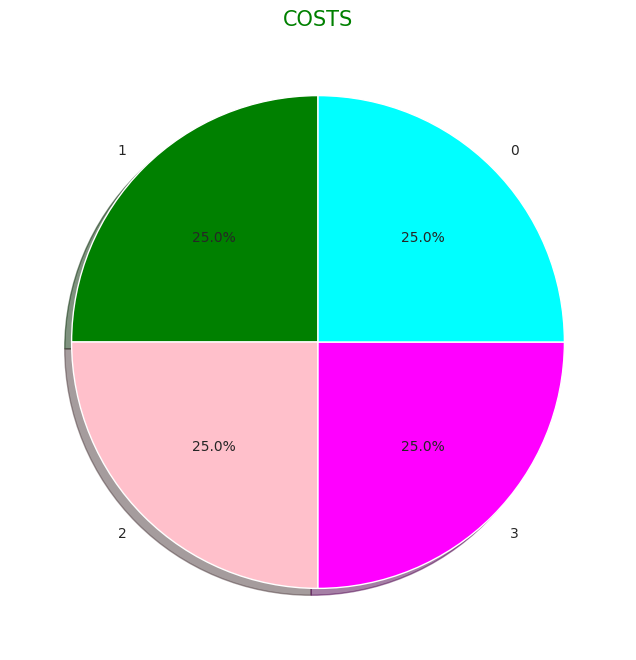

In [ ]:
labels = train["price_range"].value_counts().index
sizes = train["price_range"].value_counts()
colors = ['green','pink','magenta','cyan']
plt.figure(figsize = (8,8))
plt.pie(sizes, labels=labels, rotatelabels=False, autopct='%1.1f%%',colors=colors,shadow=True, startangle=90)
plt.title('COSTS',color = 'green',fontsize = 15)
plt.show()

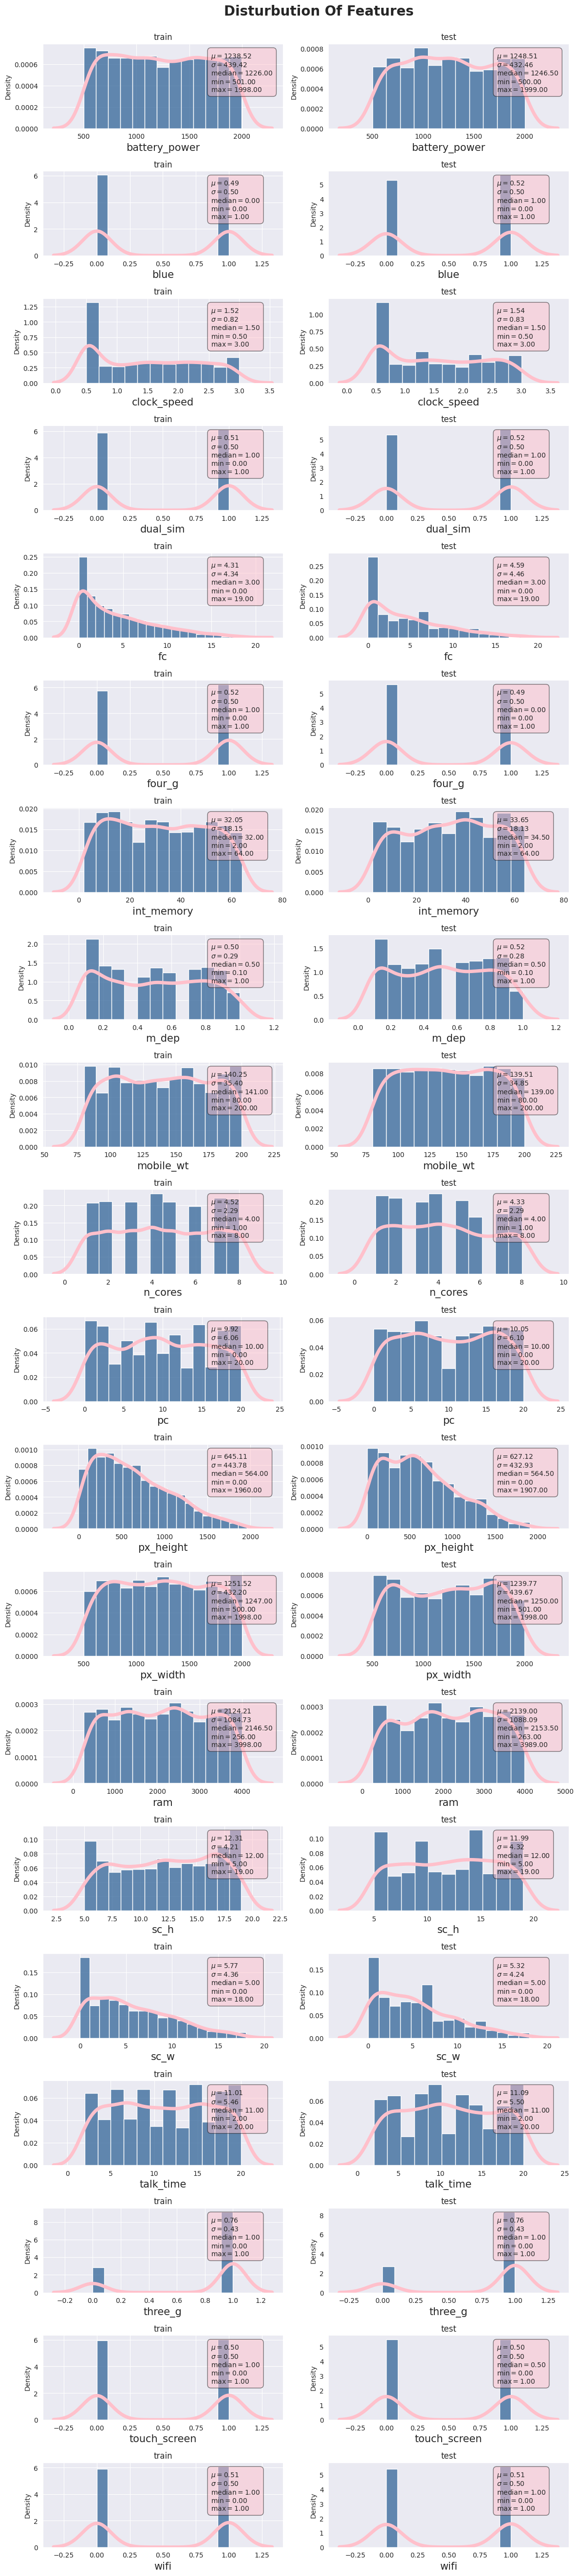

In [ ]:
sns.set_style('darkgrid')
color = 'royalblue'

plt.figure(figsize = (12,55))
i = 0
for index, col in enumerate(list(train_without_target.columns.values)):
    i += 1 ;
    plt.subplot(21,2, index + i)
    ax = sns.histplot(x = col, data = train_without_target, color = "#326598", stat = "density", common_norm=False)
    sns.kdeplot(x = col, data = train_without_target, color = "pink", linewidth = 5)
    plt.xlabel(col, size = 15)
    plt.title('train')
    # set text on axes
    textstr_train = '\n'.join((
    r'$\mu=%.2f$' %train_without_target[col].mean(),
    r'$\sigma=%.2f$' %train_without_target[col].std(),
    r'$\mathrm{median}=%0.2f$' %np.median(train_without_target[col]),
    r'$\mathrm{min}=%.2f$' %train_without_target[col].min(),
    r'$\mathrm{max}=%.2f$' %train_without_target[col].max()
    ))
    ax.text(0.7, 0.90, textstr_train, transform=ax.transAxes, fontsize=10, verticalalignment='top',
                     bbox=dict(boxstyle='round',facecolor='pink', edgecolor='black', pad=0.5, alpha = 0.5))

    plt.subplot(21,2, index + (i+1))
    ax = sns.histplot(x = col, data = test, color = "#326598", stat = "density", common_norm=False)
    sns.kdeplot(x = col, data = test, color = "pink", linewidth = 5)
    plt.xlabel(col, size = 15)
    plt.title('test')

    textstr_test = '\n'.join((
    r'$\mu=%.2f$' %test[col].mean(),
    r'$\sigma=%.2f$' %test[col].std(),
    r'$\mathrm{median}=%0.2f$' %np.median(test[col]),
    r'$\mathrm{min}=%.2f$' %test[col].min(),
    r'$\mathrm{max}=%.2f$' %test[col].max()
    ))
    ax.text(0.7, 0.90, textstr_test, transform=ax.transAxes, fontsize=10, verticalalignment='top',
                     bbox=dict(boxstyle='round',facecolor='pink', edgecolor='black', pad=0.5, alpha = 0.5))

    plt.grid()

plt.suptitle("Disturbution Of Features", y = 1, x = 0.55, size = 20,
    fontweight = "bold")
plt.tight_layout()
plt.show()

In [ ]:
num_columns=['battery_power','clock_speed', 'fc', 'int_memory','m_dep','mobile_wt','pc','px_height','px_width','ram','sc_h','sc_w','talk_time']
cat_columns=['blue','dual_sim','four_g','n_cores', 'three_g','touch_screen','wifi']

Text(0.5, 1.0, 'wifi')

<Figure size 550x650 with 0 Axes>

<Figure size 550x650 with 0 Axes>

<Figure size 550x650 with 0 Axes>

<Figure size 550x650 with 0 Axes>

<Figure size 550x650 with 0 Axes>

<Figure size 550x650 with 0 Axes>

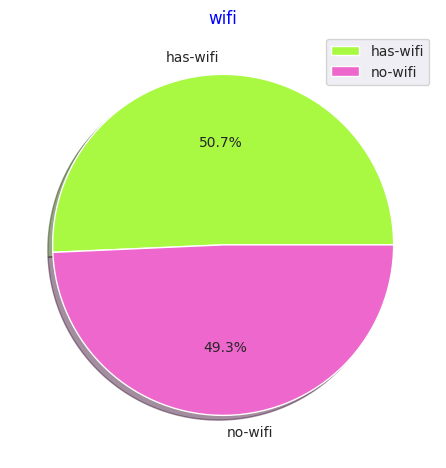

In [ ]:
colors_cat=['#8B008B','#DC143C','#FFA500','#ff8080','#556B2F','#D2691E','#DAA520']
new_train=train.replace(to_replace={'blue':[0,1],'dual_sim':[0,1],'four_g':[0,1],
                      'n_cores':[1,2,3,4,5,6,7,8],'three_g':[0,1],'touch_screen':[0,1],'wifi':[0,1]},
           value={'blue':['no-blue','has blue'],
                  'dual_sim':['no-dual-sim','has dual-sim'],
                 'four_g':['no-4G','has-4G'],
                 'n_cores':['1-core','2-cores','3-cores','4-cores','5-cores','6-cores','7-cores','8-cores'],
                 'three_g':['no-3G','has-3G'],
                 'touch_screen':['no-touch','has-touch'],
                 'wifi':['no-wifi','has-wifi']})
for i,c in enumerate(cat_columns):
    plt.figure(figsize=(5.5, 6.5))
plt.pie(new_train[c].value_counts(), labels=list(new_train[c].value_counts().index), shadow=True, autopct="%1.1f%%")
plt.legend()
plt.title(c, color="blue")

In [ ]:
test.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
dtype: int64

In [ ]:
train.drop_duplicates(inplace=True)
train.shape

(2000, 21)

In [ ]:
test.drop_duplicates(inplace=True)
test.shape

(1000, 20)

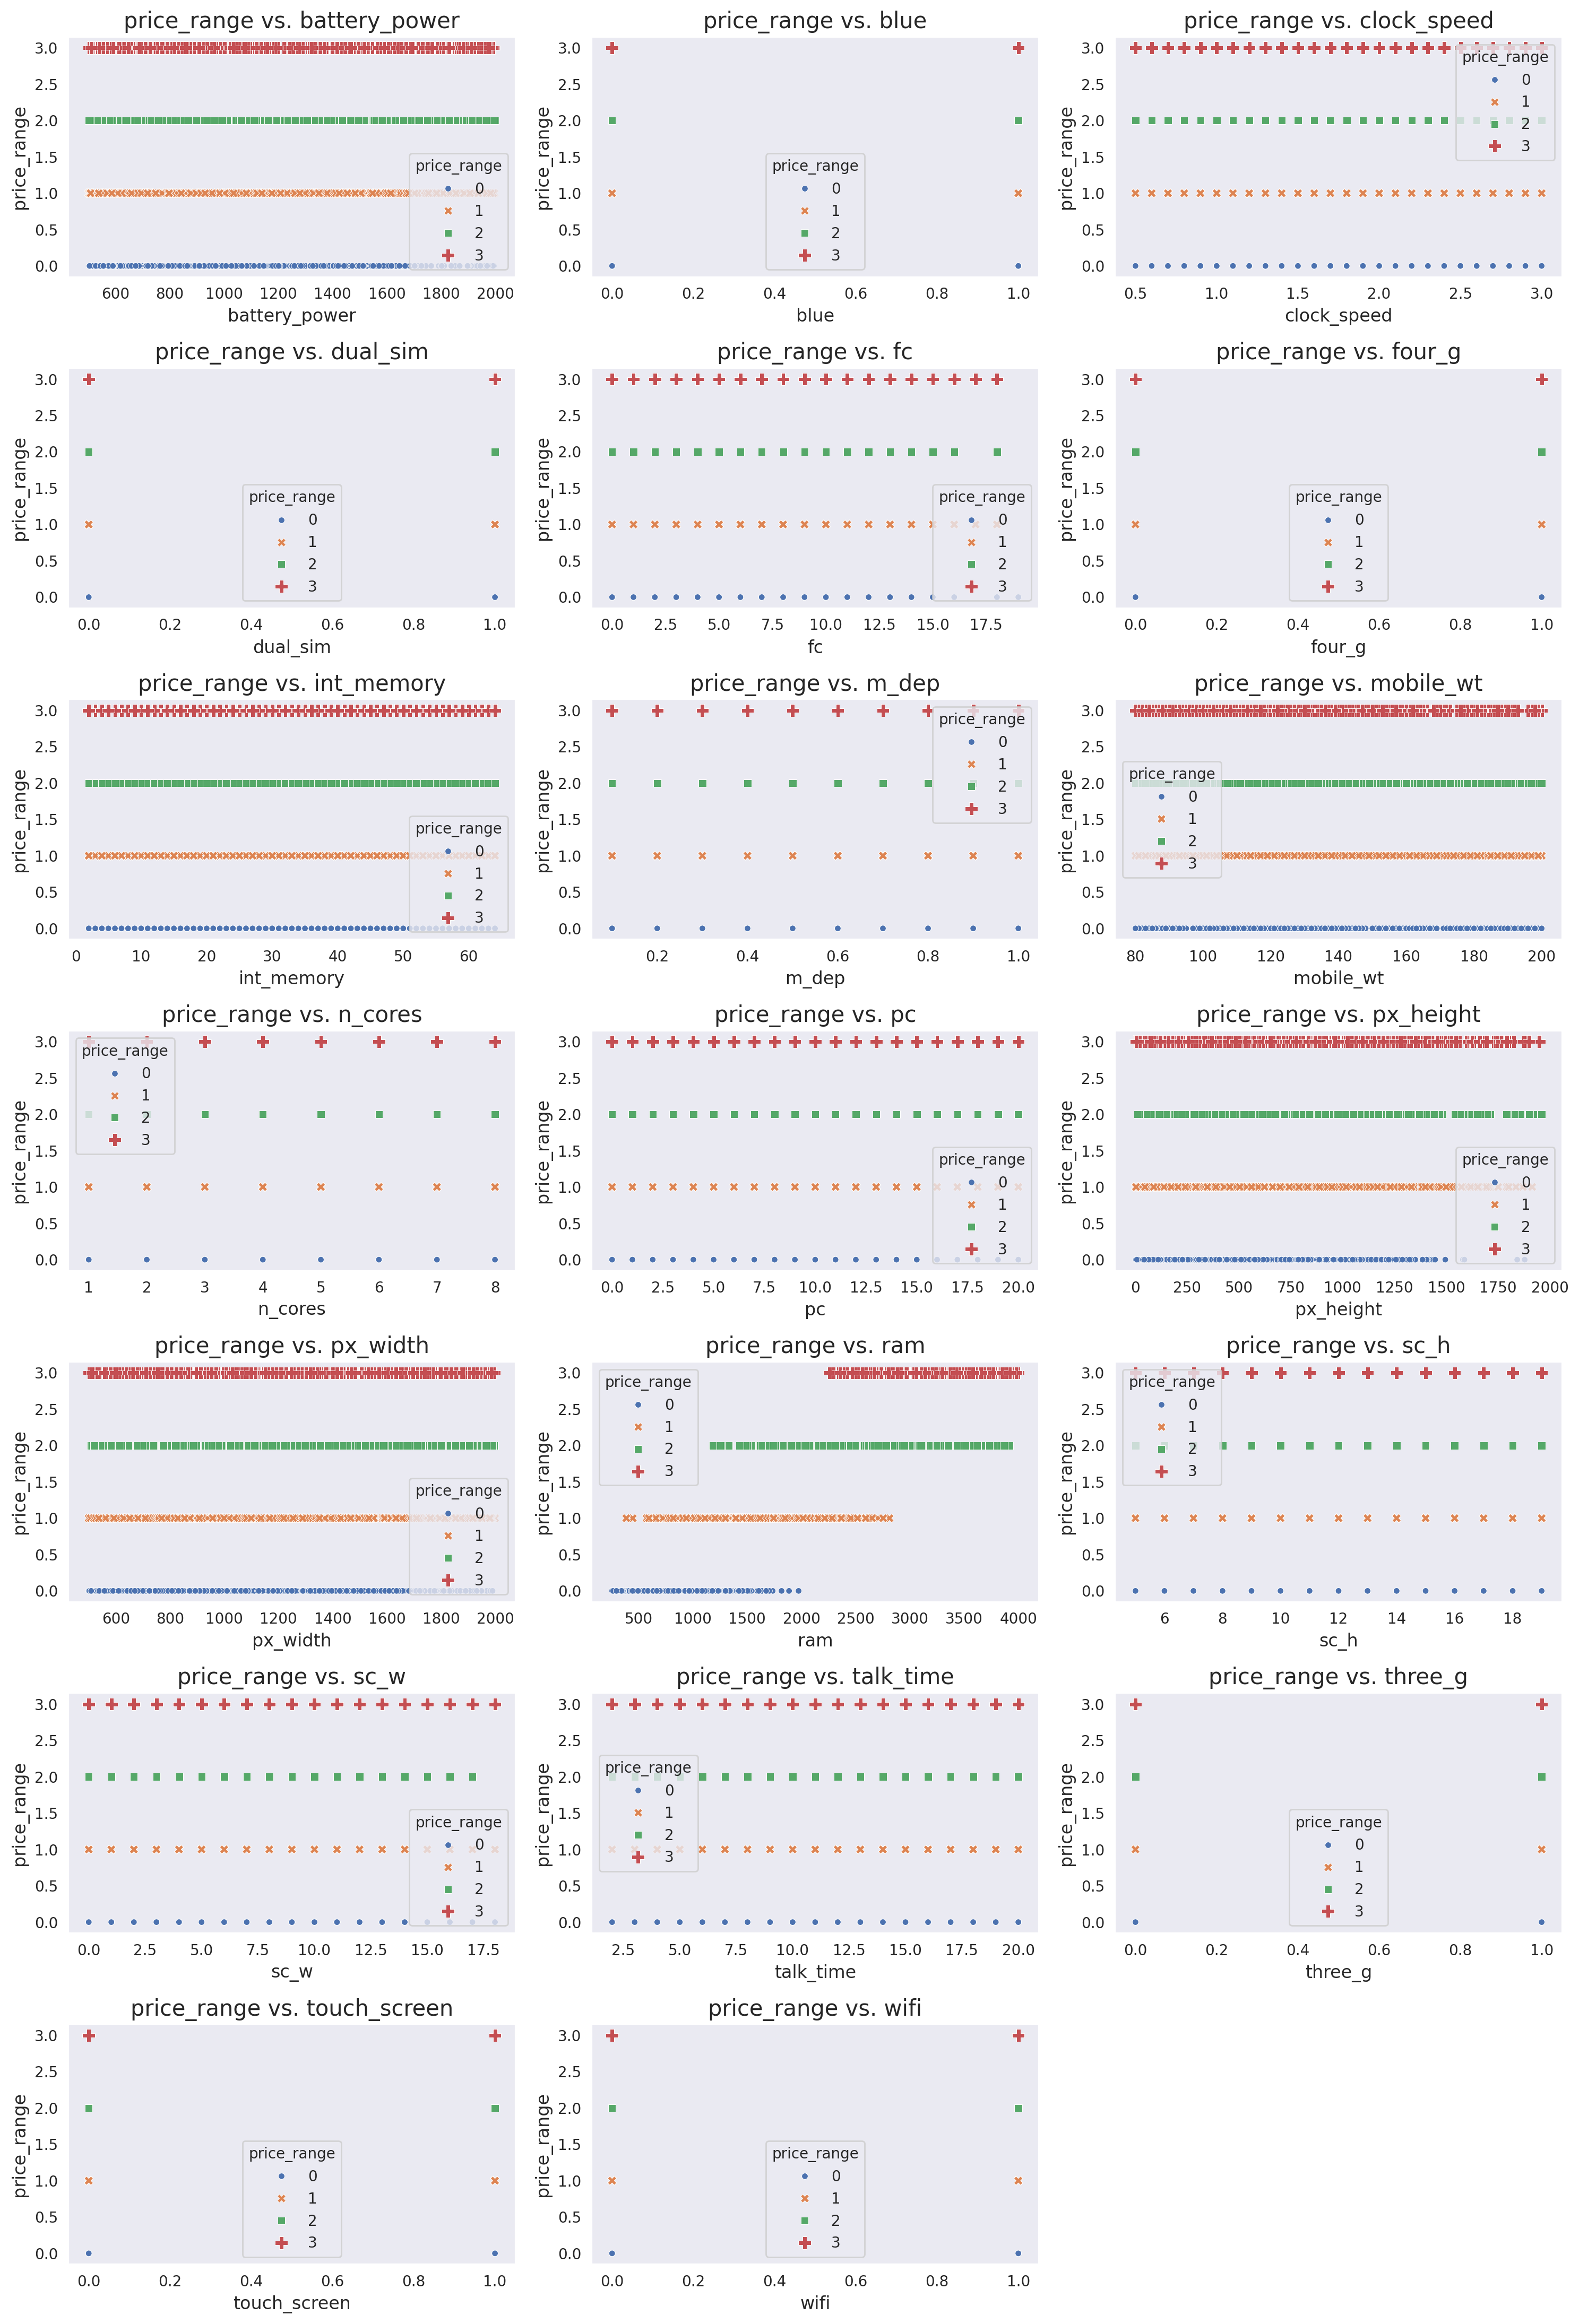

In [ ]:
target = 'price_range'
features = train.columns.drop(target)
colors = ['#a9f943', '#ed67cd', '#23bf00','#5687da']
CustomPalette = sns.set_palette(sns.color_palette(colors))
fig, ax = plt.subplots(nrows=7 ,ncols=3, figsize=(15,22), dpi=200)

for i in range(len(features)):
    x=i//3
    y=i%3
    sns.scatterplot(data=train, x=features[i], y=target,hue=target, ax=ax[x,y],style=target,palette="deep",size=target)
    ax[x,y].set_title('{} vs. {}'.format(target, features[i]), size = 15)
    ax[x,y].set_xlabel(features[i], size = 12)
    ax[x,y].set_ylabel(target, size = 12)
    ax[x,y].grid()

ax[6, 2].axis('off')

plt.tight_layout()
plt.show()

In [ ]:
print('train******************************')
print('px_height: ',len(train[(train['px_height']<217)]))
print('px_width: ',len(train[(train['px_width']<220)]))
print('test******************************')
print('px_height: ',len(test[(test['px_height']<217)]))
print('px_width: ',len(test[(test['px_width']<220)]))

train******************************
px_height:  386
px_width:  0
test******************************
px_height:  211
px_width:  0


In [ ]:
test['px_height'].replace(test['px_height'][(test['px_height']<217)].values,217,inplace=True)

In [ ]:
print('train******************************')
print('px_height: ',len(train[(train['sc_w']<2.5)]))
print('px_width: ',len(train[(train['sc_h']<5)]))
print('test******************************')
print('px_height: ',len(test[(test['sc_w']<2.5)]))
print('px_width: ',len(test[(test['sc_h']<5)]))

train******************************
px_height:  546
px_width:  0
test******************************
px_height:  318
px_width:  0


In [ ]:
train['sc_w'].replace(train['sc_w'][(train['sc_w']<2.5)].values,2.5,inplace=True)
test['sc_w'].replace(test['sc_w'][(test['sc_w']<2.5)].values,2.5,inplace=True)

In [ ]:
outliers_indexes = []
target = 'price_range'

for col in train.select_dtypes(include='object').columns:
    for cat in train[col].unique():
        df1 = train[train[col] == cat]
        q1 = df1[target].quantile(0.25)
        q3 = df1[target].quantile(0.75)
        iqr = q3-q1
        maximum = q3 + (1.5 * iqr)
        minimum = q1 - (1.5 * iqr)
        outlier_samples = df1[(df1[target] < minimum) | (df1[target] > maximum)]
        outliers_indexes.extend(outlier_samples.index.tolist())



for col in train.select_dtypes(exclude='object').columns:
    q1 = train[col].quantile(0.25)
    q3 = train[col].quantile(0.75)
    iqr = q3-q1
    maximum = q3 + (1.5 * iqr)
    minimum = q1 - (1.5 * iqr)
    outlier_samples = train[(train[col] < minimum) | (train[col] > maximum)]
    outliers_indexes.extend(outlier_samples.index.tolist())

outliers_indexes = list(set(outliers_indexes))
print('{} outliers were identified, whose indices are:\n\n{}'.format(len(outliers_indexes), outliers_indexes))

494 outliers were identified, whose indices are:

[0, 10, 19, 22, 30, 45, 49, 51, 54, 58, 67, 74, 77, 79, 82, 85, 86, 94, 95, 98, 106, 111, 118, 120, 122, 125, 134, 135, 139, 146, 148, 151, 154, 158, 159, 169, 176, 179, 182, 207, 212, 219, 222, 224, 226, 227, 229, 230, 231, 246, 250, 251, 254, 263, 269, 279, 286, 289, 290, 291, 296, 298, 300, 301, 303, 305, 307, 308, 310, 311, 314, 322, 325, 326, 327, 328, 329, 330, 334, 335, 343, 344, 349, 351, 352, 356, 360, 362, 364, 370, 372, 373, 378, 380, 387, 390, 391, 392, 406, 412, 413, 416, 423, 424, 431, 439, 440, 442, 443, 445, 449, 456, 463, 469, 470, 471, 474, 477, 478, 482, 488, 493, 496, 500, 505, 507, 508, 511, 515, 518, 523, 537, 539, 547, 550, 555, 558, 560, 561, 563, 564, 565, 567, 568, 577, 584, 588, 589, 590, 592, 595, 602, 610, 611, 614, 615, 616, 627, 636, 640, 643, 645, 649, 650, 666, 672, 673, 685, 687, 691, 692, 694, 698, 701, 704, 708, 715, 722, 723, 724, 725, 728, 731, 735, 736, 740, 741, 749, 754, 755, 757, 766, 781, 783, 

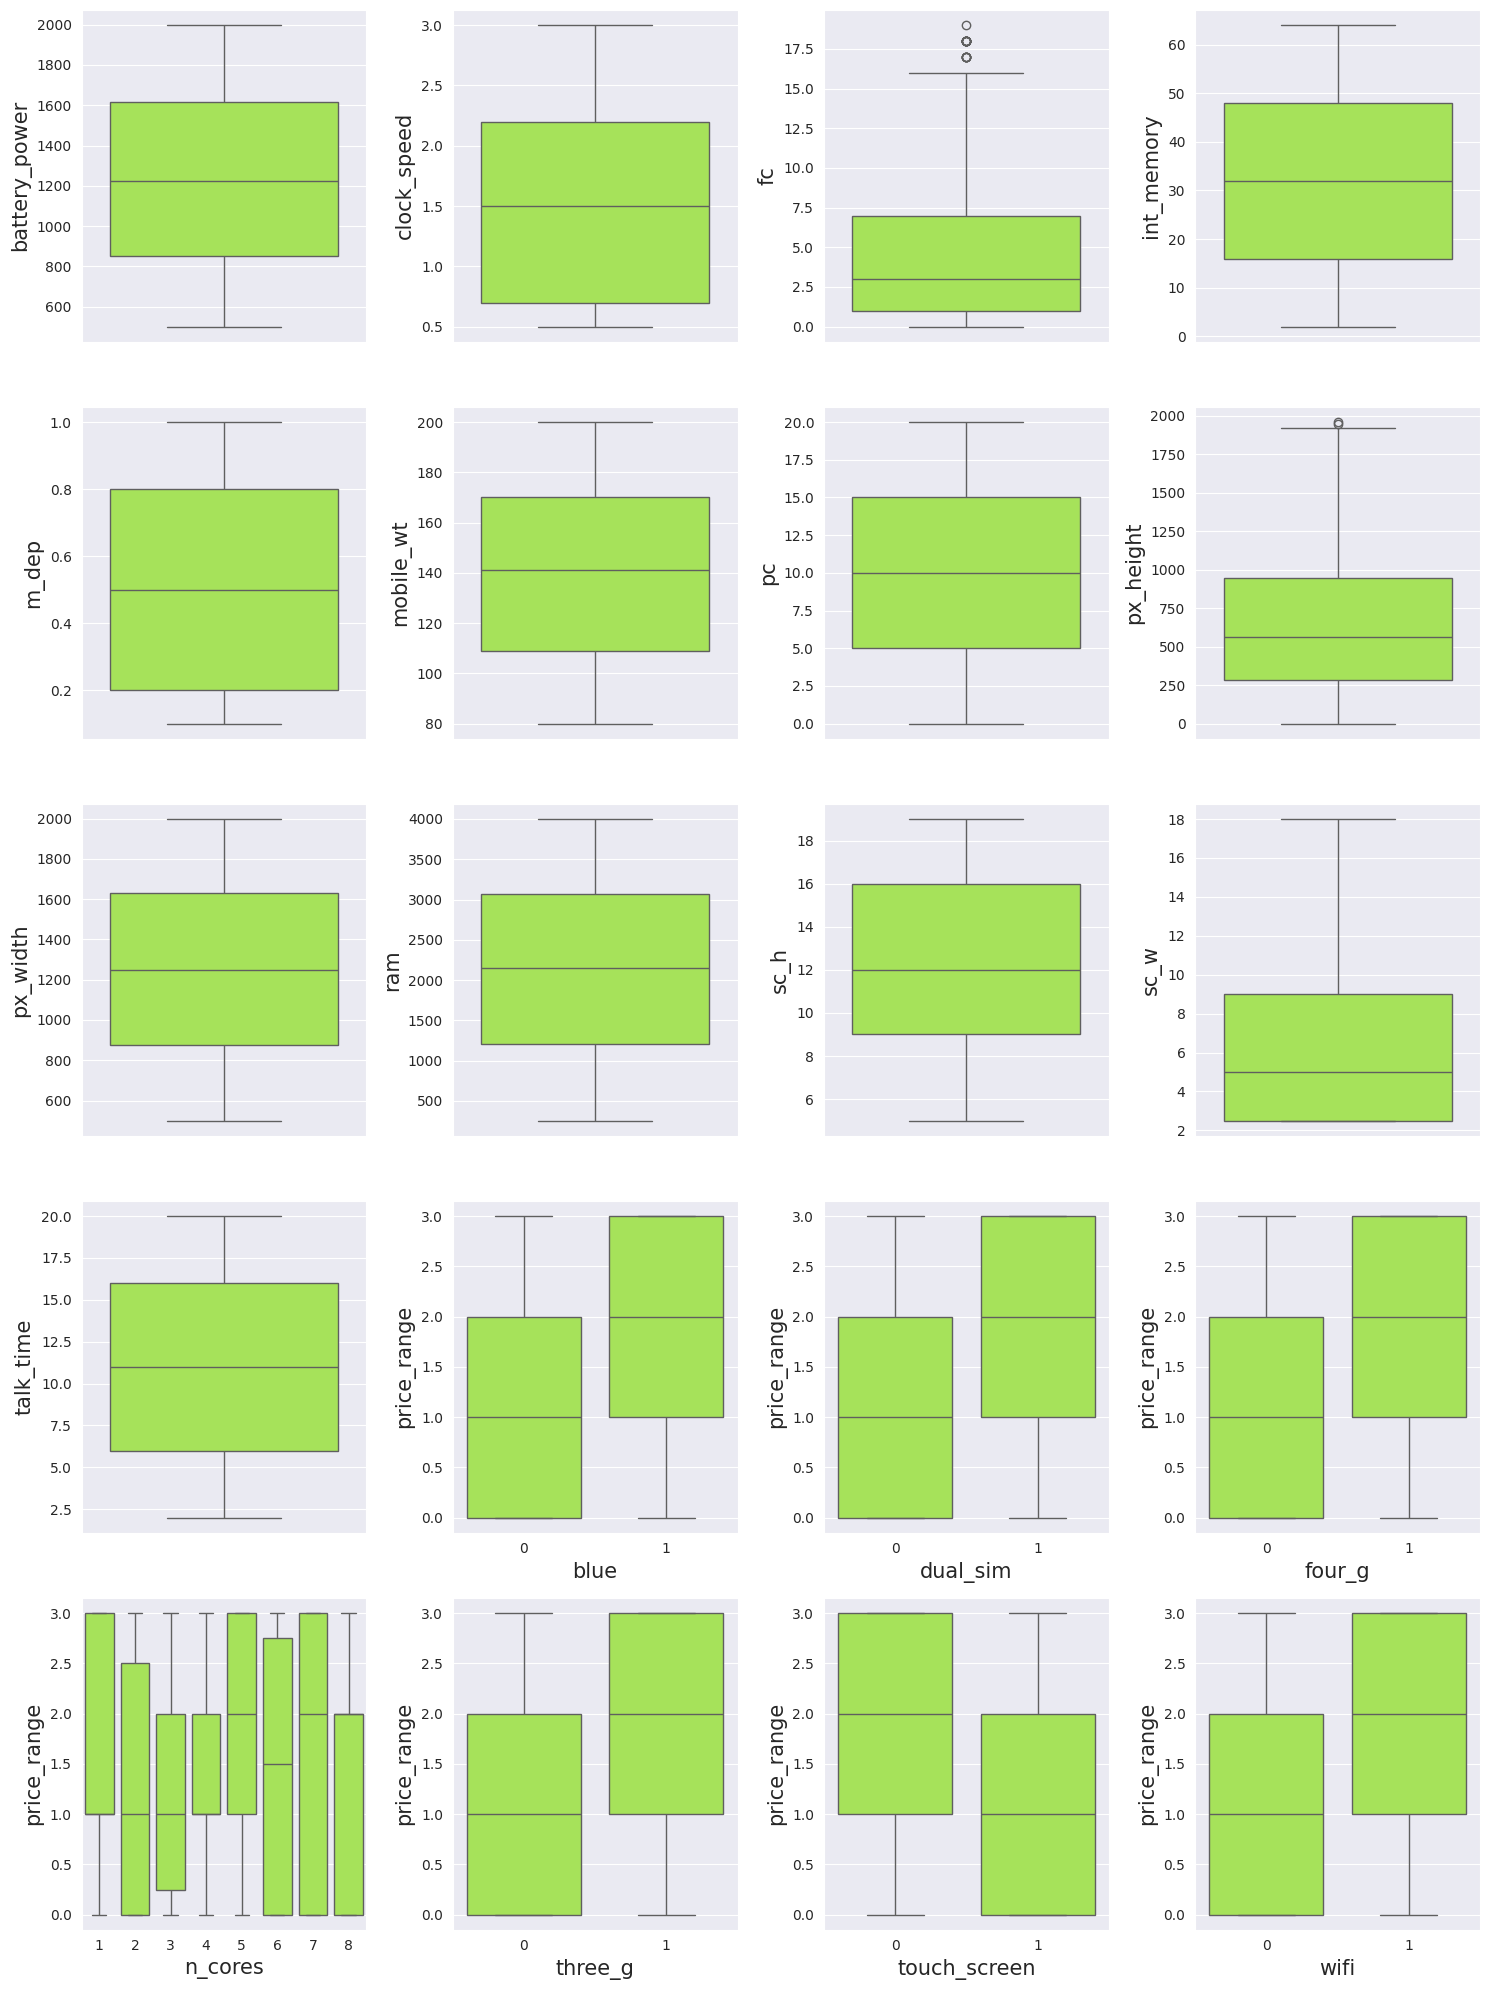

In [ ]:
sns.set_style('darkgrid')
colors = ['#a9f943', '#ed67cd', '#23bf00','#5687da','#af28aa','#8236ba','#0ff5a6','#83912c']
CustomPalette = sns.set_palette(sns.color_palette(colors))

OrderedCols = np.concatenate([num_columns,cat_columns])

fig, ax = plt.subplots(5, 4, figsize=(15,20),dpi=100)

for i,col in enumerate(OrderedCols):
    x = i//4
    y = i%4
    if i<13:
        sns.boxplot(data=train, y=col, ax=ax[x,y])
        ax[x,y].yaxis.label.set_size(15)
    else:
        sns.boxplot(data=train, x=col, y='price_range', ax=ax[x,y])
        ax[x,y].xaxis.label.set_size(15)
        ax[x,y].yaxis.label.set_size(15)

plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Triangle')

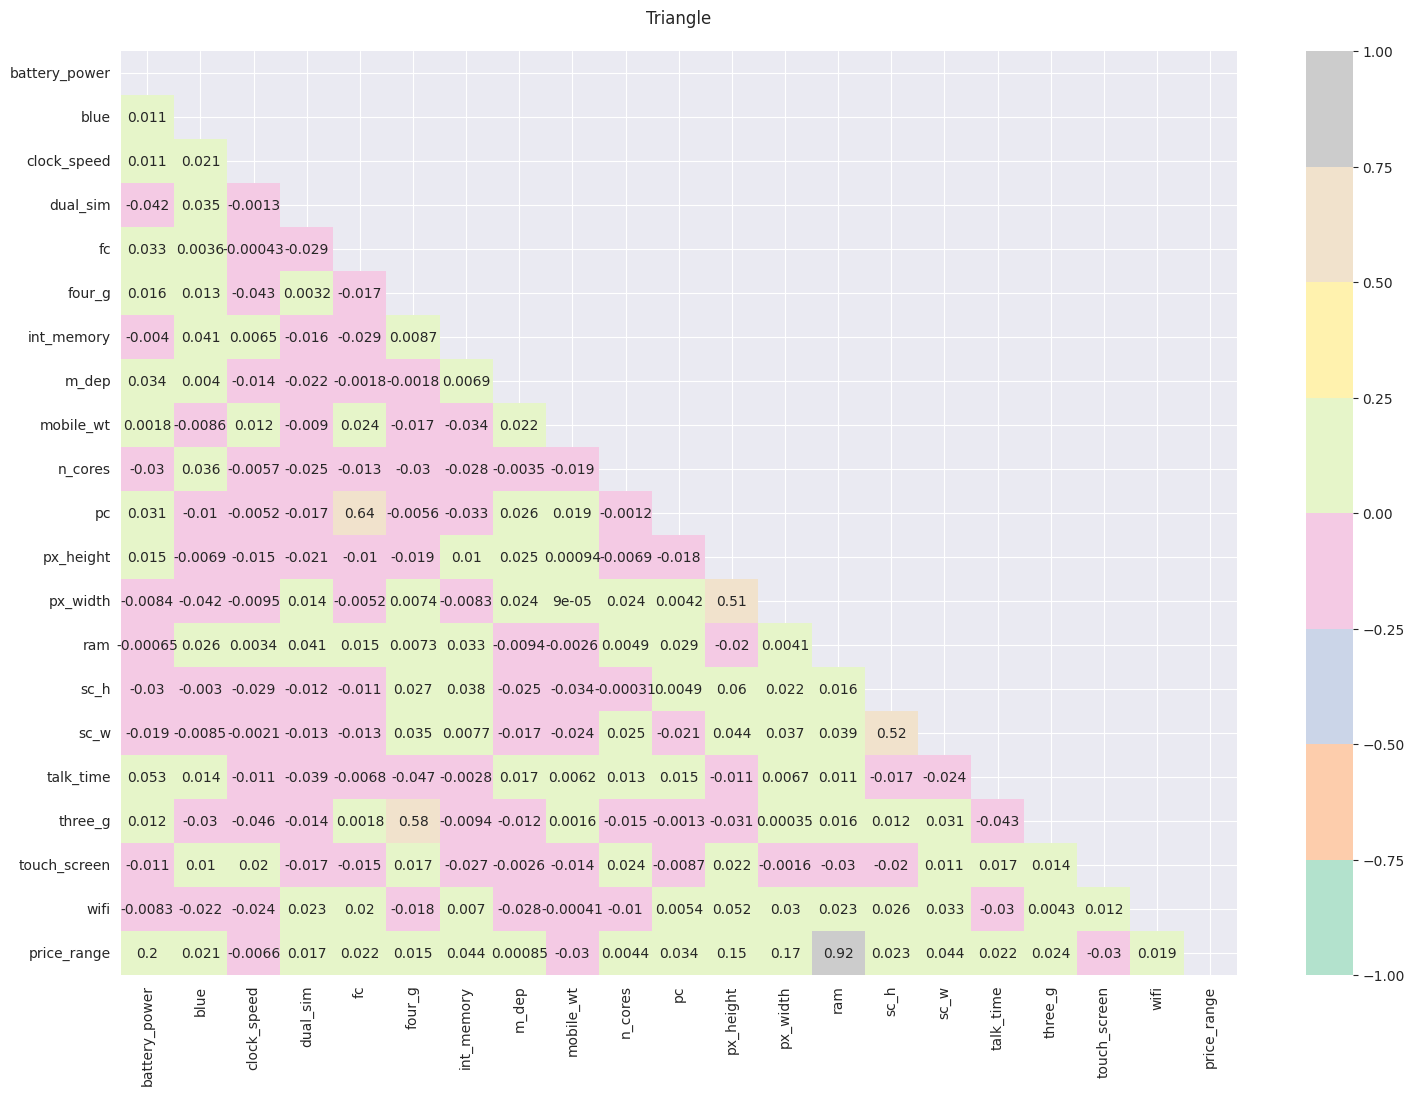

In [ ]:
fig,ax=plt.subplots(1,1,figsize=(18,12))
mask=np.triu(np.ones_like(train.corr()))
heatmap=sns.heatmap(train.corr(),vmin=-1,vmax=1,mask=mask,cmap='Pastel2',annot=True)
heatmap.set_title('Triangle',fontdict={'fontsize':12},pad=20)

In [ ]:
Y=train['price_range']
X=train.drop('price_range',axis=1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, random_state=0)

In [ ]:
def evaluate_model(models, X_train, X_test, y_train, y_test):
    compare_list = []
    for index,clf in models :
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        compare_list.append((pd.Series({"Precision" : precision_score(y_test, y_pred,average='macro'),
                           "Recall" : recall_score(y_test, y_pred,average='macro'),
                           "F1" : f1_score(y_test, y_pred,average='macro'),
                           "Accuracy" : accuracy_score(y_test, y_pred),
                           "Train_Score" : clf.score((X_train),y_train),
                           "Test_Score" : clf.score((X_test), y_test)}, name = index)))
    compare_list = pd.DataFrame(compare_list).T
    return compare_list

In [ ]:
clf_DT=DecisionTreeClassifier(random_state=0)
clf_RF=RandomForestClassifier(random_state=0)
clf_SVC=SVC(random_state=0)
models = [('DTs',clf_DT), ('RF',clf_RF),('SVC',clf_SVC)]

In [ ]:
def highlight(s):
    is_max = s == s.max()
    return ['background-color: green' if v else '' for v in is_max]

In [ ]:
result_1 = evaluate_model(models, X_train, X_test, y_train, y_test)
result_1.style.apply(highlight,axis=1)

,DTs,RF,SVC
Precision,0.833759,0.860433,0.955357
Recall,0.832126,0.862291,0.954335
F1,0.831793,0.860855,0.954309
Accuracy,0.835000,0.865000,0.955000
Train_Score,1.000000,1.000000,0.954375
Test_Score,0.835000,0.865000,0.955000


In [ ]:
def DT(X,Y,m_depth):
    compare_list_2 = []
    X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, random_state=0)
    for i in m_depth:
        clf=DecisionTreeClassifier(max_depth=i,random_state=0)
        clf.fit(X_train,y_train)
        y_pred=clf.predict(X_test)
        compare_list_2.append((pd.Series({"Precision" : precision_score(y_test, y_pred,average='macro'),
                           "Recall" : recall_score(y_test, y_pred,average='macro'),
                           "F1" : f1_score(y_test, y_pred,average='macro'),
                           "Accuracy" : accuracy_score(y_test, y_pred),
                           "Train_Score" : clf.score((X_train),y_train),
                           "Test_Score" : clf.score((X_test), y_test)}, name = i)))
    compare_list_2 = pd.DataFrame(compare_list_2).T
    return compare_list_2

In [ ]:
compare_2 = DT( X, Y, np.arange(1,30))
print('Accuracy of DT:',compare_2.loc['Accuracy',].max())
print(compare_2.idxmax(axis=1))

Accuracy of DT: 0.8425
Precision       9
Recall          8
F1              8
Accuracy        6
Train_Score    14
Test_Score      6
dtype: int64


In [ ]:
def RF(X,Y,m_depth):
    compare_list_3 = []
    X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, random_state=0)
    for i in m_depth:
        clf=RandomForestClassifier(max_depth=i,random_state=0)
        clf.fit(X_train,y_train)
        y_pred=clf.predict(X_test)
        compare_list_3.append((pd.Series({"Precision" : precision_score(y_test, y_pred,average='macro'),
                           "Recall" : recall_score(y_test, y_pred,average='macro'),
                           "F1" : f1_score(y_test, y_pred,average='macro'),
                           "Accuracy" : accuracy_score(y_test, y_pred),
                           "Train_Score" : clf.score((X_train),y_train),
                           "Test_Score" : clf.score((X_test), y_test)}, name = i)))
    compare_list_3 = pd.DataFrame(compare_list_3).T
    return compare_list_3

In [ ]:
compare_3 = RF( X, Y, np.arange(1,30))
print('Accuracy of RF:',compare_3.loc['Accuracy',].max())
print(compare_3.idxmax(axis=1))

Accuracy of RF: 0.875
Precision      15
Recall         15
F1             15
Accuracy       15
Train_Score    10
Test_Score     15
dtype: int64


In [ ]:
def SVM(X,Y):
    compare_list_4 = []
    X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, random_state=0)

    for i in range(1,150):
        for j in [2,3,4,5,6,7,8,9,10,11,12,13,14,15]:
            clf=SVC(C=i,random_state=0,kernel='poly',degree=j)
            clf.fit(X_train,y_train)
            y_pred=clf.predict(X_test)
            compare_list_4.append((pd.Series({"Precision" : precision_score(y_test, y_pred,average='macro'),
                           "Recall" : recall_score(y_test, y_pred,average='macro'),
                           "F1" : f1_score(y_test, y_pred,average='macro'),
                           "Accuracy" : accuracy_score(y_test, y_pred),
                           "Train_Score" : clf.score((X_train),y_train),
                           "Test_Score" : clf.score((X_test), y_test)}, name = (i,j))))
    compare_list_4 = pd.DataFrame(compare_list_4).T
    return compare_list_4

In [ ]:
compare_4 = SVM( X, Y)

In [ ]:
compare_4.idxmax(axis=1) # for getting the index of maximum for each row

Precision       (39, 6)
Recall          (20, 3)
F1              (39, 6)
Accuracy         (7, 4)
Train_Score    (130, 8)
Test_Score       (7, 4)
dtype: object

In [ ]:
result_2=pd.DataFrame(index=["Precision","Recall","F1", "Accuracy",'Train_Score','Test_Score'],
            columns=['DT','RF','SVM'],
            data=[[compare_2.loc['Precision',].max(),compare_3.loc['Precision',].max(),compare_4.loc['Precision',].max()],
                  [compare_2.loc['Recall',].max(),compare_3.loc['Recall',].max(),compare_4.loc['Recall',].max()],
                  [compare_2.loc['F1',].max(),compare_3.loc['F1',].max(),compare_4.loc['F1',].max()],
                  [compare_2.loc['Accuracy',].max(),compare_3.loc['Accuracy',].max(),compare_4.loc['Accuracy',].max()],
                 [compare_2.loc['Train_Score',].max(),compare_3.loc['Train_Score',].max(),compare_4.loc['Train_Score',].max()],
                  [compare_2.loc['Test_Score',].max(),compare_3.loc['Test_Score',].max(),compare_4.loc['Test_Score',].max()]])
result_2.style.apply(highlight,axis=1)

,DT,RF,SVM
Precision,0.844201,0.871943,0.972101
Recall,0.841937,0.872670,0.972290
F1,0.842623,0.872021,0.972085
Accuracy,0.842500,0.875000,0.972500
Train_Score,1.000000,1.000000,0.990625
Test_Score,0.842500,0.875000,0.972500


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, random_state=0)
clf2=SVC(C=42,random_state=0,kernel='poly',degree=2)
clf2.fit(X_train,y_train)
y_pred2=clf2.predict(X_test)
accuracy_score(y_test, y_pred2)

0.9625

In [ ]:
clf3=SVC()

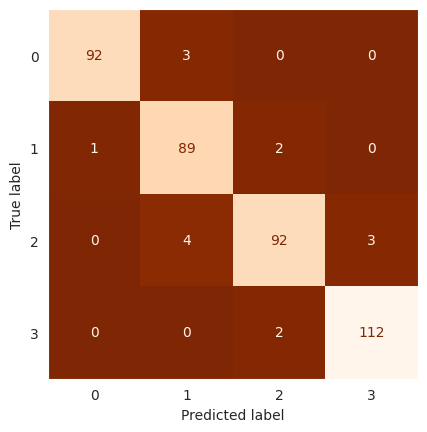

In [ ]:
ConfusionMatrixDisplay.from_estimator(clf2, X_test, y_test, colorbar=False, cmap='Oranges_r')
plt.grid(False)

In [ ]:
test['price_range']=clf2.predict(test);test

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,1043,1,1.8,1,14,0,5,0.1,193,3,...,226,1412,3476,12,7.0,2,0,1,0,3
1,841,1,0.5,1,4,1,61,0.8,191,5,...,746,857,3895,6,2.5,7,1,0,0,3
2,1807,1,2.8,0,1,0,27,0.9,186,3,...,1270,1366,2396,17,10.0,10,0,1,1,2
3,1546,0,0.5,1,18,1,25,0.5,96,8,...,295,1752,3893,10,2.5,7,1,1,0,3
4,1434,0,1.4,0,11,1,49,0.5,108,6,...,749,810,1773,15,8.0,7,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1700,1,1.9,0,0,1,54,0.5,170,7,...,644,913,2121,14,8.0,15,1,1,0,2
996,609,0,1.8,1,0,0,13,0.9,186,4,...,1152,1632,1933,8,2.5,19,0,1,1,1
997,1185,0,1.4,0,1,1,8,0.5,80,1,...,477,825,1223,5,2.5,14,1,0,0,0
998,1533,1,0.5,1,0,0,50,0.4,171,2,...,217,832,2509,15,11.0,6,0,1,0,2


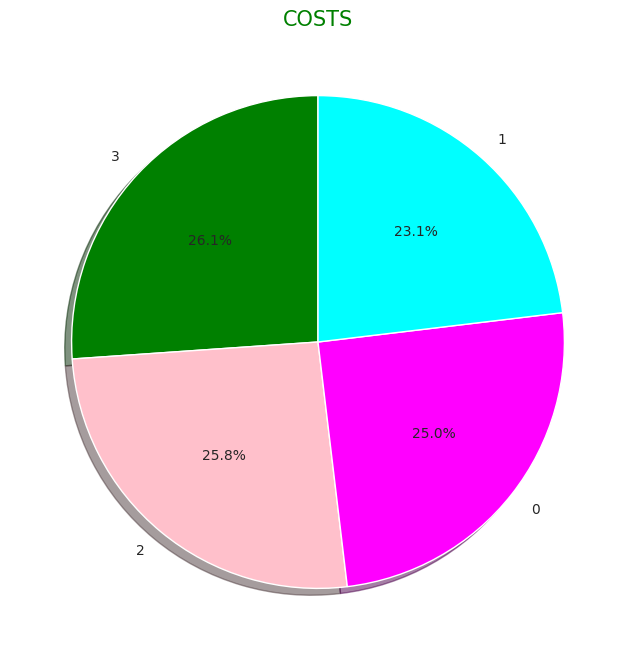

In [ ]:
labels = test["price_range"].value_counts().index
sizes = test["price_range"].value_counts()
colors = ['green','pink','magenta','cyan']
plt.figure(figsize = (8,8))
plt.pie(sizes, labels=labels, rotatelabels=False, autopct='%1.1f%%',colors=colors,shadow=True, startangle=90)
plt.title('COSTS',color = 'green',fontsize = 15)
plt.show()

<div class="markdown-google-sans">
  <h2>What is Colab?</h2>
</div>

Colab, or "Colaboratory", allows you to write and execute Python in your browser, with
- Zero configuration required
- Access to GPUs free of charge
- Easy sharing

Whether you're a **student**, a **data scientist** or an **AI researcher**, Colab can make your work easier. Watch [Introduction to Colab](https://www.youtube.com/watch?v=inN8seMm7UI) to learn more, or just get started below!

<div class="markdown-google-sans">

## **Getting started**
</div>

The document you are reading is not a static web page, but an interactive environment called a **Colab notebook** that lets you write and execute code.

For example, here is a **code cell** with a short Python script that computes a value, stores it in a variable, and prints the result:

In [ ]:
seconds_in_a_day = 24 * 60 * 60
seconds_in_a_day

86400

To execute the code in the above cell, select it with a click and then either press the play button to the left of the code, or use the keyboard shortcut "Command/Ctrl+Enter". To edit the code, just click the cell and start editing.

Variables that you define in one cell can later be used in other cells:

In [ ]:
seconds_in_a_week = 7 * seconds_in_a_day
seconds_in_a_week

604800

Colab notebooks allow you to combine **executable code** and **rich text** in a single document, along with **images**, **HTML**, **LaTeX** and more. When you create your own Colab notebooks, they are stored in your Google Drive account. You can easily share your Colab notebooks with co-workers or friends, allowing them to comment on your notebooks or even edit them. To learn more, see [Overview of Colab](/notebooks/basic_features_overview.ipynb). To create a new Colab notebook you can use the File menu above, or use the following link: [create a new Colab notebook](http://colab.research.google.com#create=true).

Colab notebooks are Jupyter notebooks that are hosted by Colab. To learn more about the Jupyter project, see [jupyter.org](https://www.jupyter.org).

<div class="markdown-google-sans">

## Data science
</div>

With Colab you can harness the full power of popular Python libraries to analyze and visualize data. The code cell below uses **numpy** to generate some random data, and uses **matplotlib** to visualize it. To edit the code, just click the cell and start editing.

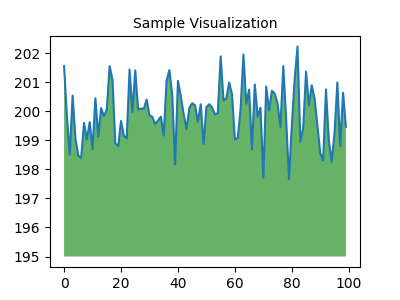

In [ ]:
import numpy as np
import IPython.display as display
from matplotlib import pyplot as plt
import io
import base64

ys = 200 + np.random.randn(100)
x = [x for x in range(len(ys))]

fig = plt.figure(figsize=(4, 3), facecolor='w')
plt.plot(x, ys, '-')
plt.fill_between(x, ys, 195, where=(ys > 195), facecolor='g', alpha=0.6)
plt.title("Sample Visualization", fontsize=10)

data = io.BytesIO()
plt.savefig(data)
image = F"data:image/png;base64,{base64.b64encode(data.getvalue()).decode()}"
alt = "Sample Visualization"
display.display(display.Markdown(F"""![{alt}]({image})"""))
plt.close(fig)

You can import your own data into Colab notebooks from your Google Drive account, including from spreadsheets, as well as from Github and many other sources. To learn more about importing data, and how Colab can be used for data science, see the links below under [Working with Data](#working-with-data).

<div class="markdown-google-sans">

## Machine learning
</div>

With Colab you can import an image dataset, train an image classifier on it, and evaluate the model, all in just [a few lines of code](https://colab.research.google.com/github/tensorflow/docs/blob/master/site/en/tutorials/quickstart/beginner.ipynb). Colab notebooks execute code on Google's cloud servers, meaning you can leverage the power of Google hardware, including [GPUs and TPUs](#using-accelerated-hardware), regardless of the power of your machine. All you need is a browser.

Colab is used extensively in the machine learning community with applications including:
- Getting started with TensorFlow
- Developing and training neural networks
- Experimenting with TPUs
- Disseminating AI research
- Creating tutorials

To see sample Colab notebooks that demonstrate machine learning applications, see the [machine learning examples](#machine-learning-examples) below.

<div class="markdown-google-sans">

## More Resources

### Working with Notebooks in Colab

</div>

- [Overview of Colaboratory](/notebooks/basic_features_overview.ipynb)
- [Guide to Markdown](/notebooks/markdown_guide.ipynb)
- [Importing libraries and installing dependencies](/notebooks/snippets/importing_libraries.ipynb)
- [Saving and loading notebooks in GitHub](https://colab.research.google.com/github/googlecolab/colabtools/blob/main/notebooks/colab-github-demo.ipynb)
- [Interactive forms](/notebooks/forms.ipynb)
- [Interactive widgets](/notebooks/widgets.ipynb)

<div class="markdown-google-sans">

<a name="working-with-data"></a>
### Working with Data
</div>

- [Loading data: Drive, Sheets, and Google Cloud Storage](/notebooks/io.ipynb)
- [Charts: visualizing data](/notebooks/charts.ipynb)
- [Getting started with BigQuery](/notebooks/bigquery.ipynb)

<div class="markdown-google-sans">

### Machine Learning Crash Course

<div>

These are a few of the notebooks from Google's online Machine Learning course. See the [full course website](https://developers.google.com/machine-learning/crash-course/) for more.
- [Intro to Pandas DataFrame](https://colab.research.google.com/github/google/eng-edu/blob/main/ml/cc/exercises/pandas_dataframe_ultraquick_tutorial.ipynb)
- [Linear regression with tf.keras using synthetic data](https://colab.research.google.com/github/google/eng-edu/blob/main/ml/cc/exercises/linear_regression_with_synthetic_data.ipynb)

<div class="markdown-google-sans">

<a name="using-accelerated-hardware"></a>
### Using Accelerated Hardware
</div>

- [TensorFlow with GPUs](/notebooks/gpu.ipynb)
- [TensorFlow with TPUs](/notebooks/tpu.ipynb)

<div class="markdown-google-sans">

<a name="machine-learning-examples"></a>

### Featured examples

</div>

- [NeMo Voice Swap](https://colab.research.google.com/github/NVIDIA/NeMo/blob/stable/tutorials/VoiceSwapSample.ipynb): Use Nvidia's NeMo conversational AI Toolkit to swap a voice in an audio fragment with a computer generated one.

- [Retraining an Image Classifier](https://tensorflow.org/hub/tutorials/tf2_image_retraining): Build a Keras model on top of a pre-trained image classifier to distinguish flowers.
- [Text Classification](https://tensorflow.org/hub/tutorials/tf2_text_classification): Classify IMDB movie reviews as either *positive* or *negative*.
- [Style Transfer](https://tensorflow.org/hub/tutorials/tf2_arbitrary_image_stylization): Use deep learning to transfer style between images.
- [Multilingual Universal Sentence Encoder Q&A](https://tensorflow.org/hub/tutorials/retrieval_with_tf_hub_universal_encoder_qa): Use a machine learning model to answer questions from the SQuAD dataset.
- [Video Interpolation](https://tensorflow.org/hub/tutorials/tweening_conv3d): Predict what happened in a video between the first and the last frame.
